# Define functions

In [45]:
import random
import matplotlib.pyplot as plt

class Person:
    def __init__(self, id, quarantine_probability, quarantine_infectiveness):
        self.id = id
        self.infected = False
        self.recovered = False
        self.quarantined = False
        self.quarantine_probability = quarantine_probability
        self.quarantine_infectiveness = quarantine_infectiveness

    def infect(self):
        self.infected = True

    def is_infected(self):
        return self.infected

    def recover(self):
        self.recovered = True

    def is_recovered(self):
        return self.recovered

    def quarantine(self):
        self.quarantined = True

    def is_quarantined(self):
        return self.quarantined

    def should_quarantine(self):
        return random.random() < self.quarantine_probability

    def get_infection_rate(self):
        if self.is_quarantined():
            return self.quarantine_infectiveness
        else:
            return 1.0


class OutbreakSimulator:
    def __init__(self, population_size, initial_infected, no_quarantine_infection_rate, with_quarantine_infection_rate, recovery_rate, quarantine_probability, quarantine_infectiveness, symptom_onset_day, disease_duration, infectiveness_reduction):
        self.population = [Person(i, quarantine_probability, quarantine_infectiveness) for i in range(population_size)]
        self.no_quarantine_infection_rate = no_quarantine_infection_rate
        self.with_quarantine_infection_rate = with_quarantine_infection_rate
        self.recovery_rate = recovery_rate
        self.symptom_onset_day = symptom_onset_day
        self.disease_duration = disease_duration
        self.infectiveness_reduction = infectiveness_reduction

        # Infect initial population
        for idx in initial_infected:
            self.population[idx].infect()

    def simulate(self, days):
        susceptible_percentages_no_quarantine = []
        infected_percentages_no_quarantine = []
        recovered_percentages_no_quarantine = []
        quarantined_percentages_no_quarantine = []

        susceptible_percentages_with_quarantine = []
        infected_percentages_with_quarantine = []
        recovered_percentages_with_quarantine = []
        quarantined_percentages_with_quarantine = []

        for day in range(days):
            susceptible_people = [person for person in self.population if not person.is_infected() and not person.is_recovered() and not person.is_quarantined()]
            infected_people = [person for person in self.population if person.is_infected()]
            recovered_people = [person for person in self.population if person.is_recovered()]
            quarantined_people = [person for person in self.population if person.is_quarantined()]

            for person in infected_people:
                self.spread_infection(person)
                if random.random() < self.recovery_rate:
                    person.recover()

            for person in susceptible_people:
                if person.should_quarantine() and day >= self.symptom_onset_day:
                    person.quarantine()

            susceptible_percentage_no_quarantine = (len(susceptible_people) / len(self.population)) * 100
            infected_percentage_no_quarantine = (len(infected_people) / len(self.population)) * 100
            recovered_percentage_no_quarantine = (len(recovered_people) / len(self.population)) * 100
            quarantined_percentage_no_quarantine = (len(quarantined_people) / len(self.population)) * 100

            susceptible_percentages_no_quarantine.append(susceptible_percentage_no_quarantine)
            infected_percentages_no_quarantine.append(infected_percentage_no_quarantine)
            recovered_percentages_no_quarantine.append(recovered_percentage_no_quarantine)
            quarantined_percentages_no_quarantine.append(quarantined_percentage_no_quarantine)

            # With Quarantine Scenario
            infected_people_with_quarantine = [person for person in self.population if person.is_infected() and person.is_quarantined()]
            recovered_people_with_quarantine = [person for person in self.population if person.is_recovered() and person.is_quarantined()]
            quarantined_people_with_quarantine = [person for person in self.population if person.is_quarantined()]

            susceptible_percentage_with_quarantine = (len(susceptible_people) / len(self.population)) * 100
            infected_percentage_with_quarantine = (len(infected_people_with_quarantine) / len(self.population)) * 100
            recovered_percentage_with_quarantine = (len(recovered_people_with_quarantine) / len(self.population)) * 100
            quarantined_percentage_with_quarantine = (len(quarantined_people_with_quarantine) / len(self.population)) * 100

            susceptible_percentages_with_quarantine.append(susceptible_percentage_with_quarantine)
            infected_percentages_with_quarantine.append(infected_percentage_with_quarantine)
            recovered_percentages_with_quarantine.append(recovered_percentage_with_quarantine)
            quarantined_percentages_with_quarantine.append(quarantined_percentage_with_quarantine)

        return (
            susceptible_percentages_no_quarantine,
            infected_percentages_no_quarantine,
            recovered_percentages_no_quarantine,
            quarantined_percentages_no_quarantine,
            susceptible_percentages_with_quarantine,
            infected_percentages_with_quarantine,
            recovered_percentages_with_quarantine,
            quarantined_percentages_with_quarantine,
        )

    def spread_infection(self, infected_person):
        for person in self.population:
            if person != infected_person and not person.is_infected() and not person.is_recovered() and not person.is_quarantined():
                if infected_person.is_quarantined():
                    infection_rate = self.with_quarantine_infection_rate
                else:
                    infection_rate = self.no_quarantine_infection_rate

                if random.random() < infection_rate * infected_person.get_infection_rate():
                    person.infect()

# Parameters

In [46]:
# Parameters
population_size = 100
initial_infected = [0, 1, 2]  # Initial infected individuals
no_quarantine_infection_rate = 0.05
with_quarantine_infection_rate = 0.1
recovery_rate = 0.6
quarantine_probability = 0.8  # Probability of a person to quarantine
quarantine_infectiveness = 0.05  # Infectiveness of a person when quarantined
simulation_days = 50
symptom_onset_day = 2
disease_duration = 14  # Number of days for the disease to disappear
infectiveness_reduction = 0.8  # Reduction factor for infectiveness each day after symptom onset

# Simulation and plotting

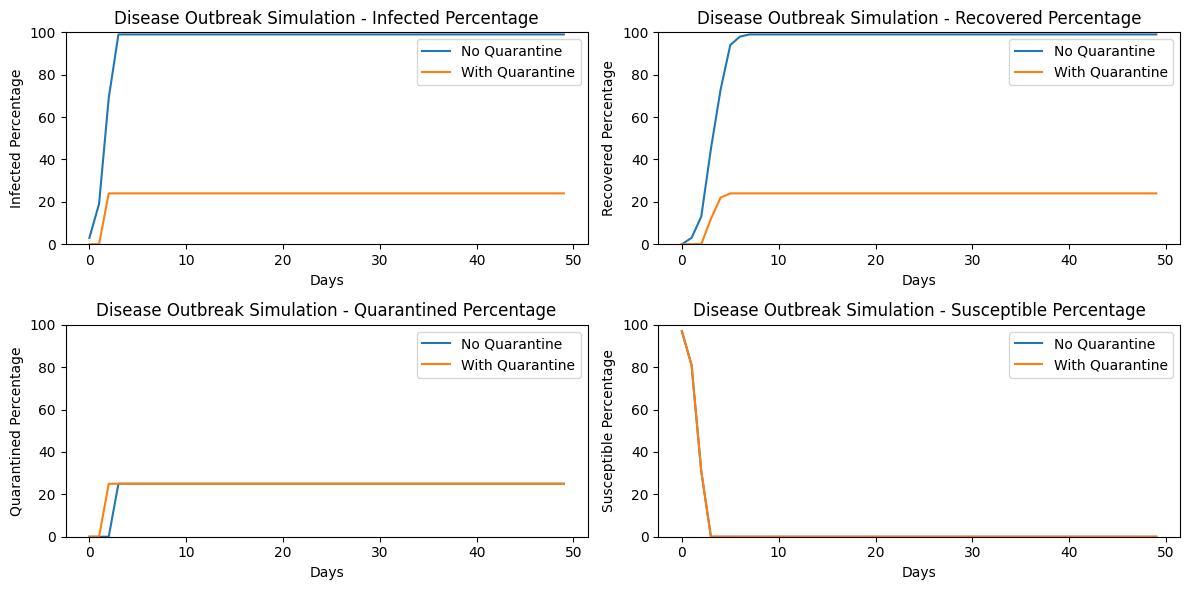

In [47]:

# Simulation - No Quarantine
simulator_no_quarantine = OutbreakSimulator(population_size, initial_infected, no_quarantine_infection_rate, with_quarantine_infection_rate, recovery_rate, 0.0, 1.0, symptom_onset_day, disease_duration, infectiveness_reduction)
(
    susceptible_percentages_no_quarantine,
    infected_percentages_no_quarantine,
    recovered_percentages_no_quarantine,
    quarantined_percentages_no_quarantine,
    _, _, _, _,
) = simulator_no_quarantine.simulate(simulation_days)

# Simulation - With Quarantine
simulator_with_quarantine = OutbreakSimulator(population_size, initial_infected, no_quarantine_infection_rate, with_quarantine_infection_rate, recovery_rate, quarantine_probability, quarantine_infectiveness, symptom_onset_day, disease_duration, infectiveness_reduction)
(
    susceptible_percentages_no_quarantine,
    infected_percentages_no_quarantine,
    recovered_percentages_no_quarantine,
    quarantined_percentages_no_quarantine,
    susceptible_percentages_with_quarantine,
    infected_percentages_with_quarantine,
    recovered_percentages_with_quarantine,
    quarantined_percentages_with_quarantine,
) = simulator_with_quarantine.simulate(simulation_days)

# Plotting the results
days = range(simulation_days)

plt.figure(figsize=(12, 6))

# Infected Percentages
plt.subplot(2, 2, 1)
plt.plot(days, infected_percentages_no_quarantine, label='No Quarantine')
plt.plot(days, infected_percentages_with_quarantine, label='With Quarantine')
plt.xlabel('Days')
plt.ylabel('Infected Percentage')
plt.title('Disease Outbreak Simulation - Infected Percentage')
plt.ylim(0, 100)
plt.legend()

# Recovered Percentages
plt.subplot(2, 2, 2)
plt.plot(days, recovered_percentages_no_quarantine, label='No Quarantine')
plt.plot(days, recovered_percentages_with_quarantine, label='With Quarantine')
plt.xlabel('Days')
plt.ylabel('Recovered Percentage')
plt.title('Disease Outbreak Simulation - Recovered Percentage')
plt.ylim(0, 100)
plt.legend()

# Quarantined Percentages
plt.subplot(2, 2, 3)
plt.plot(days, quarantined_percentages_no_quarantine, label='No Quarantine')
plt.plot(days, quarantined_percentages_with_quarantine, label='With Quarantine')
plt.xlabel('Days')
plt.ylabel('Quarantined Percentage')
plt.title('Disease Outbreak Simulation - Quarantined Percentage')
plt.ylim(0, 100)
plt.legend()

# Susceptible Percentages
plt.subplot(2, 2, 4)
plt.plot(days, susceptible_percentages_no_quarantine, label='No Quarantine')
plt.plot(days, susceptible_percentages_with_quarantine, label='With Quarantine')
plt.xlabel('Days')
plt.ylabel('Susceptible Percentage')
plt.title('Disease Outbreak Simulation - Susceptible Percentage')
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()